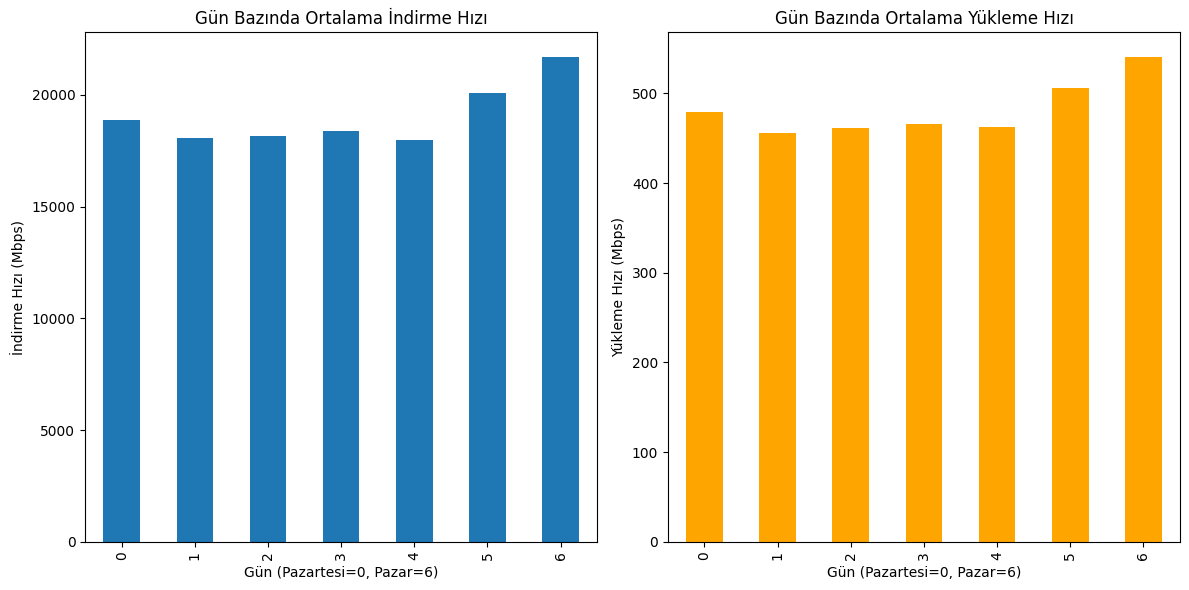

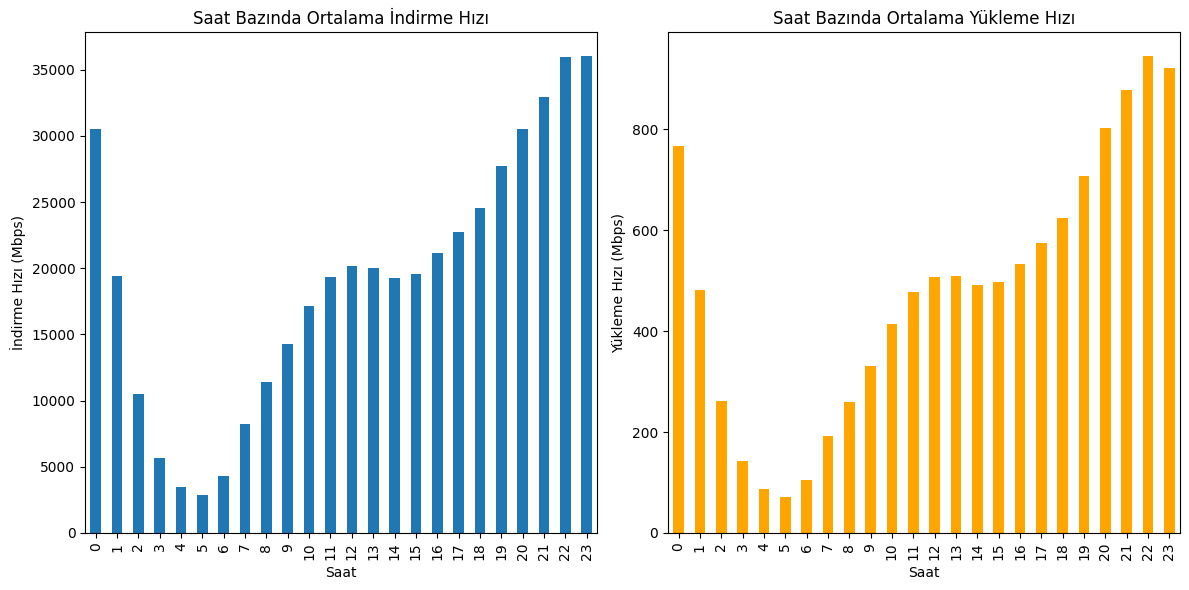

In [16]:
# Gerekli kütüphaneleri tekrar yükleyelim
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı tekrar yükleyelim
file_path = 'hackathon.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Zaman Damgasından Bilgileri Çıkarın
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df.set_index('TIME_STAMP', inplace=True)
df['HAFTA_GUNU'] = df.index.dayofweek  # Pazartesi=0, Pazar=6
df['SAAT'] = df.index.hour
df['DAKIKA'] = df.index.minute

# Veriyi günlere ayıralım ve her günü ayrı inceleyelim
gun_bazinda = df.groupby('HAFTA_GUNU').mean(numeric_only=True)

# Gün bazında ortalama indirme ve yükleme hızı grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
gun_bazinda['DOWNLOAD'].plot(kind='bar')
plt.title('Gün Bazında Ortalama İndirme Hızı')
plt.xlabel('Gün (Pazartesi=0, Pazar=6)')
plt.ylabel('İndirme Hızı (Mbps)')

plt.subplot(1, 2, 2)
gun_bazinda['UPLOAD'].plot(kind='bar', color='orange')
plt.title('Gün Bazında Ortalama Yükleme Hızı')
plt.xlabel('Gün (Pazartesi=0, Pazar=6)')
plt.ylabel('Yükleme Hızı (Mbps)')

plt.tight_layout()
plt.show()

# Gün farketmeksizin saat bazında inceleme
saat_bazinda = df.groupby('SAAT').mean(numeric_only=True)

# Saat bazında ortalama indirme ve yükleme hızı grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
saat_bazinda['DOWNLOAD'].plot(kind='bar')
plt.title('Saat Bazında Ortalama İndirme Hızı')
plt.xlabel('Saat')
plt.ylabel('İndirme Hızı (Mbps)')

plt.subplot(1, 2, 2)
saat_bazinda['UPLOAD'].plot(kind='bar', color='orange')
plt.title('Saat Bazında Ortalama Yükleme Hızı')
plt.xlabel('Saat')
plt.ylabel('Yükleme Hızı (Mbps)')

plt.tight_layout()
plt.show()


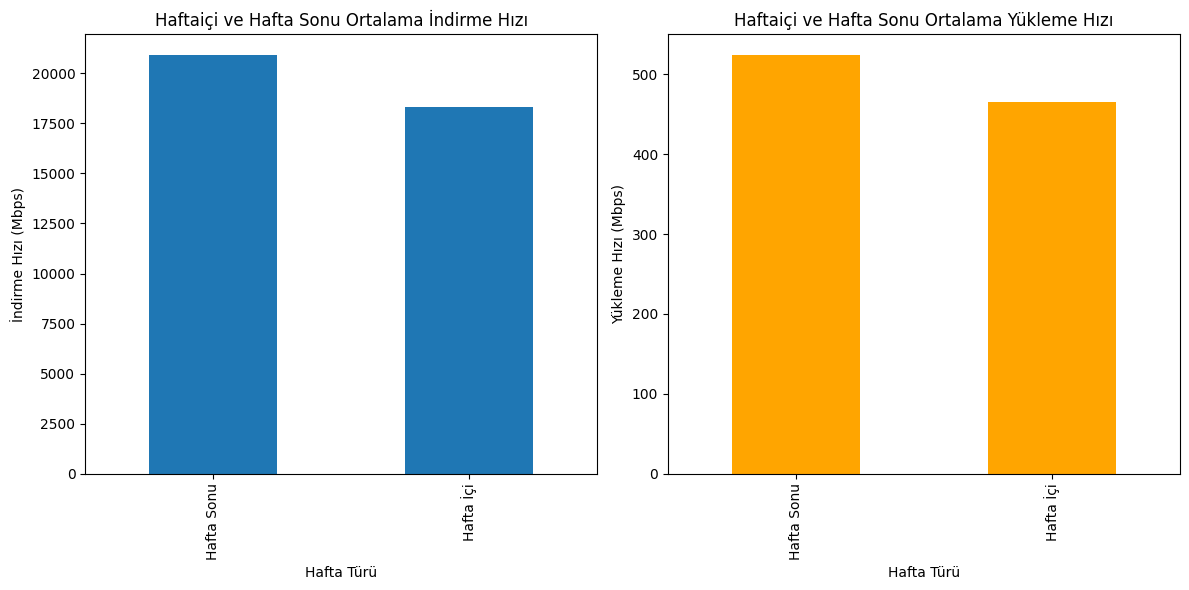

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı tekrar yükleyelim
file_path = 'hackathon.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# TIME_STAMP kolonundan gün, saat ve dakika bilgilerini çıkaralım
data['TIME_STAMP'] = pd.to_datetime(data['TIME_STAMP'])
data['WEEKDAY'] = data['TIME_STAMP'].dt.dayofweek  # Pazartesi=0, Pazar=6
data['HOUR'] = data['TIME_STAMP'].dt.hour
data['MINUTE'] = data['TIME_STAMP'].dt.minute

# Gün isimlerini belirleyelim
gun_isimleri = {0: 'Pazartesi', 1: 'Salı', 2: 'Çarşamba', 3: 'Perşembe', 4: 'Cuma', 5: 'Cumartesi', 6: 'Pazar'}
data['WEEKDAY'] = data['WEEKDAY'].map(gun_isimleri)

# Haftaiçi ve hafta sonu olarak verileri ayıralım
data['WEEK_TYPE'] = data['WEEKDAY'].apply(lambda x: 'Hafta İçi' if x in ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma'] else 'Hafta Sonu')

# Haftaiçi ve hafta sonu bazında ortalama indirme ve yükleme hızlarını hesaplayalım
hafta_bazinda = data.groupby('WEEK_TYPE').mean(numeric_only=True)

# Haftaiçi ve hafta sonu ortalama indirme ve yükleme hızı grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hafta_bazinda['DOWNLOAD'].plot(kind='bar')
plt.title('Haftaiçi ve Hafta Sonu Ortalama İndirme Hızı')
plt.xlabel('Hafta Türü')
plt.ylabel('İndirme Hızı (Mbps)')

plt.subplot(1, 2, 2)
hafta_bazinda['UPLOAD'].plot(kind='bar', color='orange')
plt.title('Haftaiçi ve Hafta Sonu Ortalama Yükleme Hızı')
plt.xlabel('Hafta Türü')
plt.ylabel('Yükleme Hızı (Mbps)')

plt.tight_layout()
plt.show()


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_20892\1458460545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data['HOUR'] == hour]['DOWNLOAD'] for hour in range(24)], labels=range(24))


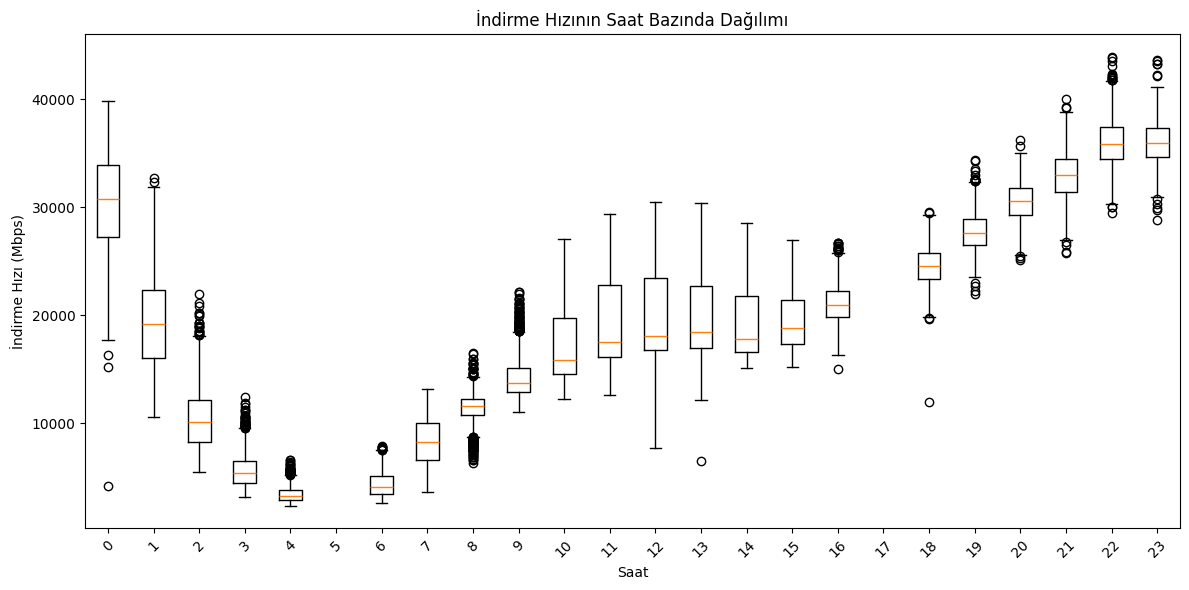

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_20892\1458460545.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data['HOUR'] == hour]['UPLOAD'] for hour in range(24)], labels=range(24))


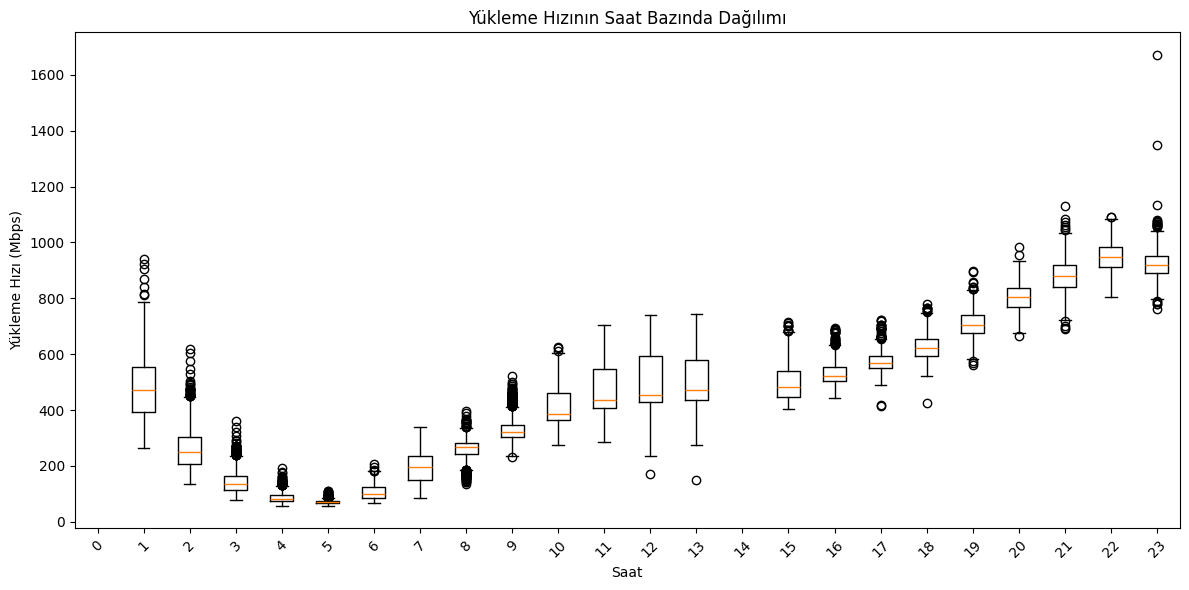

In [28]:
# İndirme hızının saat bazında dağılımını inceleyelim
plt.figure(figsize=(12, 6))
plt.boxplot([data[data['HOUR'] == hour]['DOWNLOAD'] for hour in range(24)], labels=range(24))
plt.title('İndirme Hızının Saat Bazında Dağılımı')
plt.xlabel('Saat')
plt.ylabel('İndirme Hızı (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yükleme hızının saat bazında dağılımını inceleyelim
plt.figure(figsize=(12, 6))
plt.boxplot([data[data['HOUR'] == hour]['UPLOAD'] for hour in range(24)], labels=range(24))
plt.title('Yükleme Hızının Saat Bazında Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Yükleme Hızı (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
